In [124]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [125]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
drug_data = study_data.groupby("Drug Regimen")
drug_results = drug_data.mean()
drug_results = drug_results[["Tumor Volume (mm3)"]]
drug_results = drug_results.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"})
drug_results["Median Tumor Volume (mm3)"] = drug_data["Tumor Volume (mm3)"].median()
drug_results["Tumor Volume Variance"] = drug_data["Tumor Volume (mm3)"].var()
drug_results["Tumor Volume Standard Deviation"] = drug_data["Tumor Volume (mm3)"].std()
drug_results["Tumor Volume SEM"] = drug_data["Tumor Volume (mm3)"].sem()
drug_results

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [126]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_table = study_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

(-0.75, 9.75)

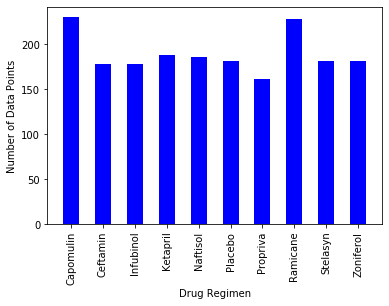

In [127]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count = drug_data["Tumor Volume (mm3)"].count()
drug_count.plot(kind="bar", facecolor="blue")

# Format chart
plt.ylabel("Number of Data Points")
 # Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

(-0.75, 9.75)

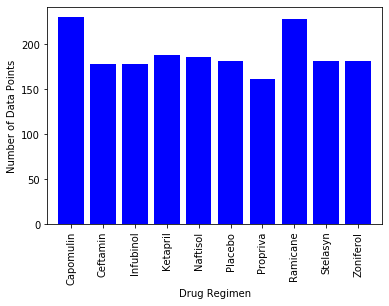

In [128]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_names = study_data["Drug Regimen"].unique()
x_axis = np.arange(len(drug_names))
y_axis = [drug_count[x] for x in range(len(drug_count))]
plt.bar(x_axis, y_axis, color="blue")

# Format chart
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
tick_locations = [value for value in x_axis]
drug_names.sort()
plt.xticks(tick_locations, drug_names, rotation="90")
plt.xlim(-0.75, len(x_axis)-0.25)

(-1.2076939577793158,
 1.1101719390349558,
 -1.1065652022428258,
 1.1003126286782299)

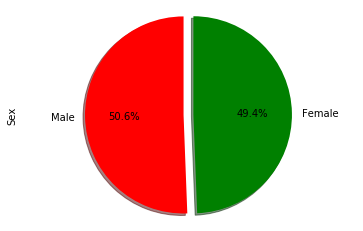

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = study_data["Sex"].value_counts()
mice_sex.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["red", "green"], explode = [0.1,0], shadow=True)
plt.axis('equal')

(-1.2076939577793158,
 1.1101719390349558,
 -1.1065652022428258,
 1.1003126286782299)

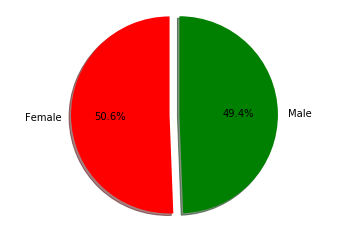

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
gender_counts = [mice_sex[x] for x in range(len(mice_sex))]
colors = ["red", "green"]
explode = [0.1, 0]
plt.pie(gender_counts, labels=sex, colors=colors, explode=explode, startangle=90, shadow=True, autopct="%1.1f%%")
plt.axis('equal')

In [160]:
# Get mouse ids, drug name, time points and tumor volumes for top 4 drugs
capomulin_data = study_data.loc[study_data["Drug Regimen"] == "Capomulin" , :]
ramicane_data = study_data.loc[study_data["Drug Regimen"] == "Ramicane", :]
infubinol_data = study_data.loc[study_data["Drug Regimen"] == "Infubinol", :]
ceftamin_data = study_data.loc[study_data["Drug Regimen"] == "Ceftamin", :]

top_drugs = capomulin_data.append(ramicane_data)
top_drugs = top_drugs.append(infubinol_data)
top_drugs = top_drugs.append(ceftamin_data)
top_drugs = top_drugs[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

In [161]:
# Find final timepoint for each mouse
mouse_results = study_data.groupby("Mouse ID")
end_time = mouse_results["Timepoint"].max()
print(end_time)

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64


In [162]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
final_volumes = pd.merge(end_time, top_drugs, on="Mouse ID")
final_volumes = final_volumes.loc[final_volumes["Timepoint_x"] == final_volumes["Timepoint_y"], :]
final_volumes = final_volumes[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
final_volumes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,a203,Infubinol,67.973419
19,a251,Infubinol,65.525743
29,a275,Ceftamin,62.999356
39,a411,Ramicane,38.407618
49,a444,Ramicane,43.047543
...,...,...,...
773,y769,Ceftamin,68.594745
783,y793,Capomulin,31.896238
793,y865,Ceftamin,64.729837
803,z578,Ramicane,30.638696


In [163]:
# Give quartile calculations for Capomulin
capomulin_volumes = final_volumes.loc[final_volumes["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
capomulin_quartiles = capomulin_volumes.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The lower quartile of Capomulin tumor volumes is: {capomulin_lowerq}")
print(f"The upper quartile of Capomulin tumor volumes is: {capomulin_upperq}")
print(f"The interquartile range of Capomulin tumor volumes is: {capomulin_iqr}")
print(f"The the median of Capomulin tumor volumes is: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

The lower quartile of Capomulin tumor volumes is: 32.37735684
The upper quartile of Capomulin tumor volumes is: 40.1592203
The interquartile range of Capomulin tumor volumes is: 7.781863460000004
The the median of Capomulin tumor volumes is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [164]:
# Give quartile calculations for Ramicane
ramicane_volumes = final_volumes.loc[final_volumes["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
ramicane_quartiles = ramicane_volumes.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print(f"The lower quartile of Ramicane tumor volumes is: {ramicane_lowerq}")
print(f"The upper quartile of Ramicane tumor volumes is: {ramicane_upperq}")
print(f"The interquartile range of Ramicane tumor volumes is: {ramicane_iqr}")
print(f"The the median of Ramicane tumor volumes is: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

The lower quartile of Ramicane tumor volumes is: 31.56046955
The upper quartile of Ramicane tumor volumes is: 40.65900627
The interquartile range of Ramicane tumor volumes is: 9.098536719999998
The the median of Ramicane tumor volumes is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [165]:
# Give quartile calculations for Infubinol
infubinol_volumes = final_volumes.loc[final_volumes["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
infubinol_quartiles = infubinol_volumes.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print(f"The lower quartile of Infubinol tumor volumes is: {infubinol_lowerq}")
print(f"The upper quartile of Infubinol tumor volumes is: {infubinol_upperq}")
print(f"The interquartile range of Infubinol tumor volumes is: {infubinol_iqr}")
print(f"The the median of Infubinol tumor volumes is: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

The lower quartile of Infubinol tumor volumes is: 54.04860769
The upper quartile of Infubinol tumor volumes is: 65.52574285
The interquartile range of Infubinol tumor volumes is: 11.477135160000003
The the median of Infubinol tumor volumes is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [166]:
# Give quartile calculations for Ceftamin
ceftamin_volumes = final_volumes.loc[final_volumes["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
ceftamin_quartiles = ceftamin_volumes.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

print(f"The lower quartile of Ceftamin tumor volumes is: {ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin tumor volumes is: {ceftamin_upperq}")
print(f"The interquartile range of Ceftamin tumor volumes is: {ceftamin_iqr}")
print(f"The the median of Ceftamin tumor volumes is: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of Ceftamin tumor volumes is: 48.72207785
The upper quartile of Ceftamin tumor volumes is: 64.29983003
The interquartile range of Ceftamin tumor volumes is: 15.577752179999997
The the median of Ceftamin tumor volumes is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


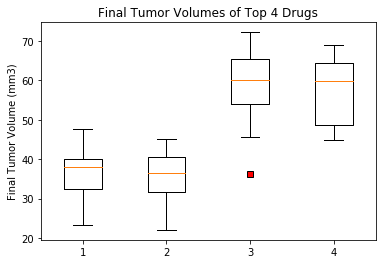

In [167]:
# Example outlier plot of reaction times
data = [capomulin_volumes, ramicane_volumes, infubinol_volumes, ceftamin_volumes]
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes of Top 4 Drugs')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=red_square)
plt.show()

Text(0.5, 1.0, 'Tumor Volume of Mouse s185 over time')

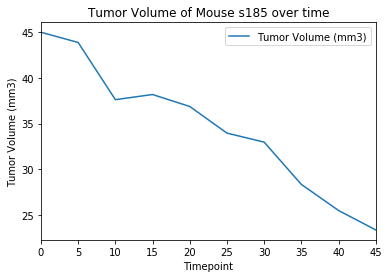

In [174]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185", :]
s185_data.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of Mouse s185 over time")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

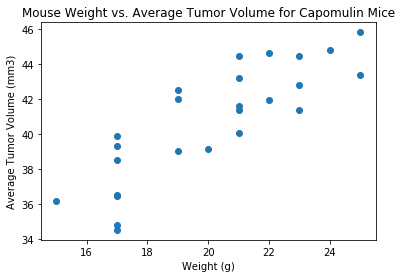

In [178]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse_data = capomulin_data.groupby("Mouse ID")
mouse_weight = capomulin_mouse_data["Weight (g)"].mean()
average_tumor_volume = capomulin_mouse_data["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, average_tumor_volume, marker="o")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Mice")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

In [180]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The equation for the linear regression model for the mouse weight vs. average tumor chart is {line_eq}")
print(f"The r-squared is: {rvalue}")

The equation for the linear regression model for the mouse weight vs. average tumor chart is y = 0.95x + 21.55
The r-squared is: 0.8419363424694718
